### Installation


In [2]:
!pip install textures

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 983kB 8.0MB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
     |████████████████████████████████| 3.0MB 31.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=53b4ae3e3ba465303bf9ebc7dd368c5b7c7c03ea7e19bd5d004a46696bfa3f79
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


You may also need running the following commands before using the package

In [3]:
!pip install  pyenchant
!apt-get install enchant
!python -m textblob.download_corpora

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 21 not upgraded.
Need to get 1,310 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libaspell15 amd64 0.60.7~20110707-4ubuntu0.1 [309 kB]
Get:3 h

In [14]:
import pandas as pd
from textures.features import *
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

Now lets download a dataset of Trump's tweets to show how we can use textures for feature extraction from Trump's tweets!

In [5]:
!wget https://raw.githubusercontent.com/mkearney/trumptweets/master/data/trumptweets-1515775693.tweets.csv

--2020-10-16 10:58:21--  https://raw.githubusercontent.com/mkearney/trumptweets/master/data/trumptweets-1515775693.tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12913888 (12M) [text/plain]
Saving to: ‘trumptweets-1515775693.tweets.csv’

trumptweets-1515775 100%[===================>]  12.32M  24.7MB/s    in 0.5s    

2020-10-16 10:58:23 (24.7 MB/s) - ‘trumptweets-1515775693.tweets.csv’ saved [12913888/12913888]



In [6]:
data = pd.read_csv('trumptweets-1515775693.tweets.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,30,31,32,36,37,38,42,43,44,45,46,47,50,51,52,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,status_id,created_at,user_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,quoted_name,quoted_followers_count,quoted_friends_count,quoted_statuses_count,quoted_location,quoted_description,quoted_verified,retweet_status_id,retweet_text,retweet_created_at,retweet_source,retweet_favorite_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords
0,x1864367186,2009-05-20 22:29:47,x25073877,realDonaldTrump,Read a great interview with Donald Trump that ...,Twitter Web Client,112,NaN,NaN,NaN,False,False,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,x9273573134835712,2010-11-29 15:52:46,x25073877,realDonaldTrump,Congratulations to Evan Lysacek for being nomi...,Twitter Web Client,127,NaN,NaN,NaN,False,False,7,32,EvanForSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,x29014512646,2010-10-28 18:53:40,x25073877,realDonaldTrump,I was on The View this morning. We talked abou...,Twitter Web Client,139,NaN,NaN,NaN,False,False,6,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,x7483813542232064,2010-11-24 17:20:54,x25073877,realDonaldTrump,Tomorrow night's episode of The Apprentice del...,Twitter Web Client,140,NaN,NaN,NaN,False,False,17,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,x5775731054,2009-11-16 21:06:10,x25073877,realDonaldTrump,Donald Trump Partners with TV1 on New Reality ...,Twitter Web Client,116,NaN,NaN,NaN,False,False,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.shape

(32826, 68)

It might take a while to compute features for the whole dataset. So, I will use a sample of Trump's latest tweets to illustrate my example.

In [27]:
%%time
trump_1000_tweets = extract_features(data.tail(1000))


CPU times: user 9.24 s, sys: 116 ms, total: 9.36 s
Wall time: 9.37 s


In [23]:
trump_1000_tweets['created_at'] = pd.to_datetime(trump_1000_tweets['created_at'])
trump_1000_tweets.head()

,status_id,created_at,user_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,quoted_name,quoted_followers_count,...,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,n_emojis,n_entities,n_stopwords,n_tokens,n_unique_tokens,n_words,n_unique_words,n_sentences,n_misspelled_words,first_personp,second_person_pronouns,third_person,third_personp,n_to_be,n_prepositions,polarity,subjectivity,n_hashtags,n_unique_hashtags,n_mentions,n_unique_mentions,n_characters,n_unique_characters,n_unique_urls,n_upper,n_lower,n_numbers,n_puncts,n_exclaims,n_extraspace,n_title,language,readability_score
31826,x876546864669237253,2017-06-18 21:07:12,x25073877,realDonaldTrump,RT @DiamondandSilk: The Media Says: The Presi...,Twitter for iPhone,144,NaN,NaN,NaN,False,True,0,14212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x2908170952,DiamondandSilk,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,12,33,30,24,22,2,3,0,0,0,1,0,1,0.600000,1.000000,0,0,1,1,144,40,0,2,23,0,8,0,1,18,en,48.13
31827,x876388733607694336,2017-06-18 10:38:51,x25073877,realDonaldTrump,The MAKE AMERICA GREAT AGAIN agenda is doing v...,Twitter for iPhone,140,NaN,NaN,NaN,False,False,99360,20866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,11,27,25,23,22,2,0,0,0,0,0,1,2,0.359273,0.508909,0,0,0,0,140,37,0,1,19,0,5,0,0,4,en,68.26
31828,x877891129194102785,2017-06-22 14:08:50,x25073877,realDonaldTrump,...Why did the DNC REFUSE to turn over its Ser...,Twitter for iPhone,139,NaN,NaN,NaN,False,False,90771,24756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,19,34,30,30,26,2,3,0,0,2,0,0,4,-0.031250,0.075000,0,0,0,0,139,37,0,3,27,0,8,1,0,4,en,91.11
31829,x876896144944762880,2017-06-19 20:15:07,x25073877,realDonaldTrump,My heartfelt thoughts and prayers are with the...,Twitter for iPhone,132,NaN,NaN,NaN,False,False,54594,12245,USSFitzgerald,NaN,navy.mil/submit/display…,https://t.co/a4Sm8SrLv7,http://www.navy.mil/submit/display.asp?story_i...,http://pbs.twimg.com/media/DCtcYnXXUAAlg8j.jpg,https://t.co/uDbkXoBtkZ,https://twitter.com/realDonaldTrump/status/876...,photo,http://pbs.twimg.com/media/DCtcYnXXUAAlg8j.jpg,https://t.co/uDbkXoBtkZ,https://twitter.com/realDonaldTrump/status/876...,NaN,x54885400,USNavy,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,9,24,22,21,19,2,6,0,0,0,1,1,2,0.000000,1.000000,1,1,1,1,156,44,0,1,30,4,13,0,0,1,en,43.73
31830,x878596457741287424,2017-06-24 12:51:33,x25073877,realDonaldTrump,Democrats slam GOP healthcare proposal as Obam...,Twitter for iPhone,144,NaN,NaN,NaN,False,False,79339,20547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,7,27,25,21,19,2,0,0,2,0,0,0,2,0.000000,0.000000,0,0,0,0,144,33,0,1,19,1,6,0,0,3,en,69.28


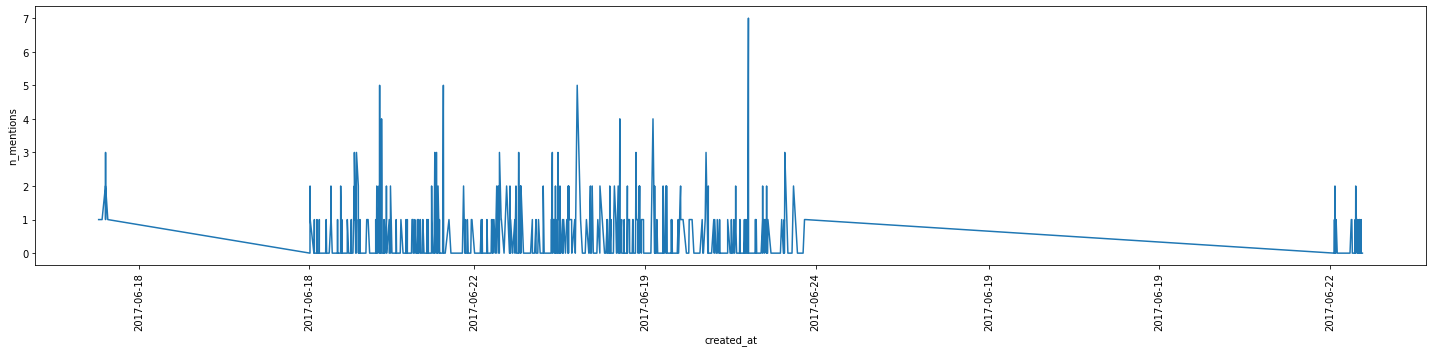

In [24]:
plt.figure(figsize=(20,5))
sns.lineplot( x = 'created_at',y= 'n_mentions',data = trump_1000_tweets)
plt.xticks(plt.xticks()[0], trump_1000_tweets.created_at.dt.date, rotation=90)
plt.tight_layout()
plt.show()

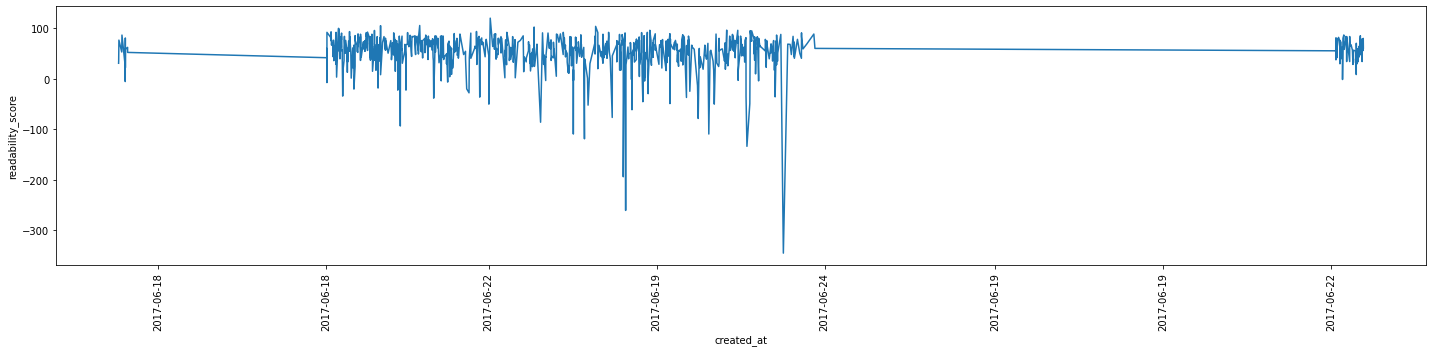

In [25]:
plt.figure(figsize=(20,5))
sns.lineplot( x = 'created_at',y= 'readability_score',data = trump_1000_tweets)
plt.xticks(plt.xticks()[0], trump_1000_tweets.created_at.dt.date, rotation=90)
plt.tight_layout()
plt.show()

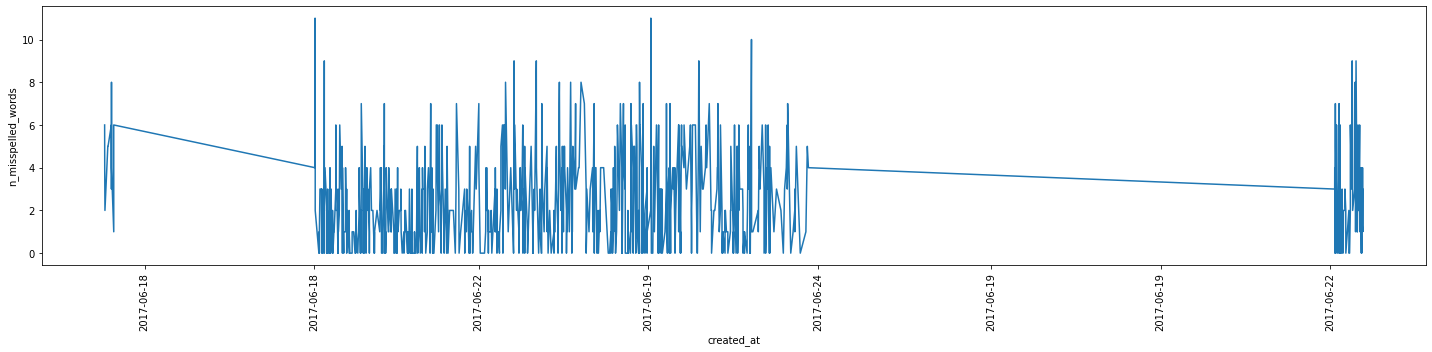

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot( x = 'created_at',y= 'n_misspelled_words',data = trump_1000_tweets)
plt.xticks(plt.xticks()[0], trump_1000_tweets.created_at.dt.date, rotation=90)
plt.tight_layout()
plt.show()

Alternatively, you can turn off some feautres when running `extract_features` function to speed up the process. For instance, in this dataset we don't need to compute n_hashtags or n_mentions separately since this information can be easily extracted from other columns in this dataset.

In [29]:
%%time
trump_1000_tweets = extract_features(data.tail(1000),use_emoji_features=False,n_hashtags=False,n_unique_hashtags=False,detect_lang=False)

CPU times: user 5.43 s, sys: 69.6 ms, total: 5.5 s
Wall time: 5.5 s
